<a href="https://colab.research.google.com/github/ThiagoHenriques1991/Brownian-Motion/blob/main/Derivativos_T%C3%B3pico_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <font color = crimson> <font size = 6.0> Tópico 03
    
---

# <font color = blue> Importação de pacotes

In [2]:
# Bibliotecas/ pacotes

import pandas as pd

import numpy as np
import scipy
import scipy.stats as ss
import sympy as sy

import datetime as dt
from datetime import date, timedelta

In [3]:
# plot

import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
sns.set_style('darkgrid')
plt.rc("figure", figsize = (16, 6))
plt.rc("savefig", dpi = 90)
plt.rc("font",family = "sans-serif")
plt.rc("font",size = 14)


# <font color='blue'> Payoff da call

## <font color='Green'> Função para cálculo do payoff

In [4]:
# criando uma função no Python para calcular o payoff da call

def payoff_call(ST, strike_price):
    payoff = np.maximum(ST - strike_price, 0)
    return payoff

## <font color='Green'> Cálculo do payoff para um único valor de $S_T$

In [5]:
payoff_call(ST = 130, strike_price = 100)


30

## <font color='Green'>  Cálculo do payoff para vários valores de $S_T$

In [6]:
# np.linspace(start = 0, stop = 10, num = 11)

In [7]:
step = 0.5
# np.arange(start = 0, stop = 10, step = step)
np.arange(0, 10 + step, step)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [8]:
# intervalo de valores para o preço da ação

# o intervalo de valores vai de (1 - alpha) * s0 até (1 + alpha) * s0
s0 = 100
alpha = 0.5
sT_min = (1 - alpha) * s0
sT_max = (1 + alpha) * s0
step_stock = 0.01 * s0

# Syntaxe: np.arange(start, stop, step); stop não está incluído na lista
sT = np.arange(start = sT_min, stop = sT_max + step_stock, step = step_stock)

# mostrando o resultado
sT

array([ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
       127., 128., 129., 130., 131., 132., 133., 134., 135., 136., 137.,
       138., 139., 140., 141., 142., 143., 144., 145., 146., 147., 148.,
       149., 150.])

In [9]:
# cálculo do payoff da call para vários valores de S_T
payoff_da_call = payoff_call(ST = sT, strike_price = 100)

# mostrando o resultado
payoff_da_call

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

## <font color='Green'>  Criando um DataFrame: $S_T$ e payoff

In [10]:
# criando um DataFrame com os valores de S_T e os valores do payoff

# passo 01 - criando um dicionário
dict_payoff_call = {'ST': sT, 'payoff call': payoff_da_call}

# passo 02 - setando S_T como index do DataFrame
df_payoff_call = pd.DataFrame(dict_payoff_call).set_index('ST')


# mostrando o resultado
df_payoff_call

,payoff call
ST,
50.0,0.0
51.0,0.0
52.0,0.0
53.0,0.0
54.0,0.0
...,...
146.0,46.0
147.0,47.0
148.0,48.0


## <font color='Green'>  Plotando o payoff

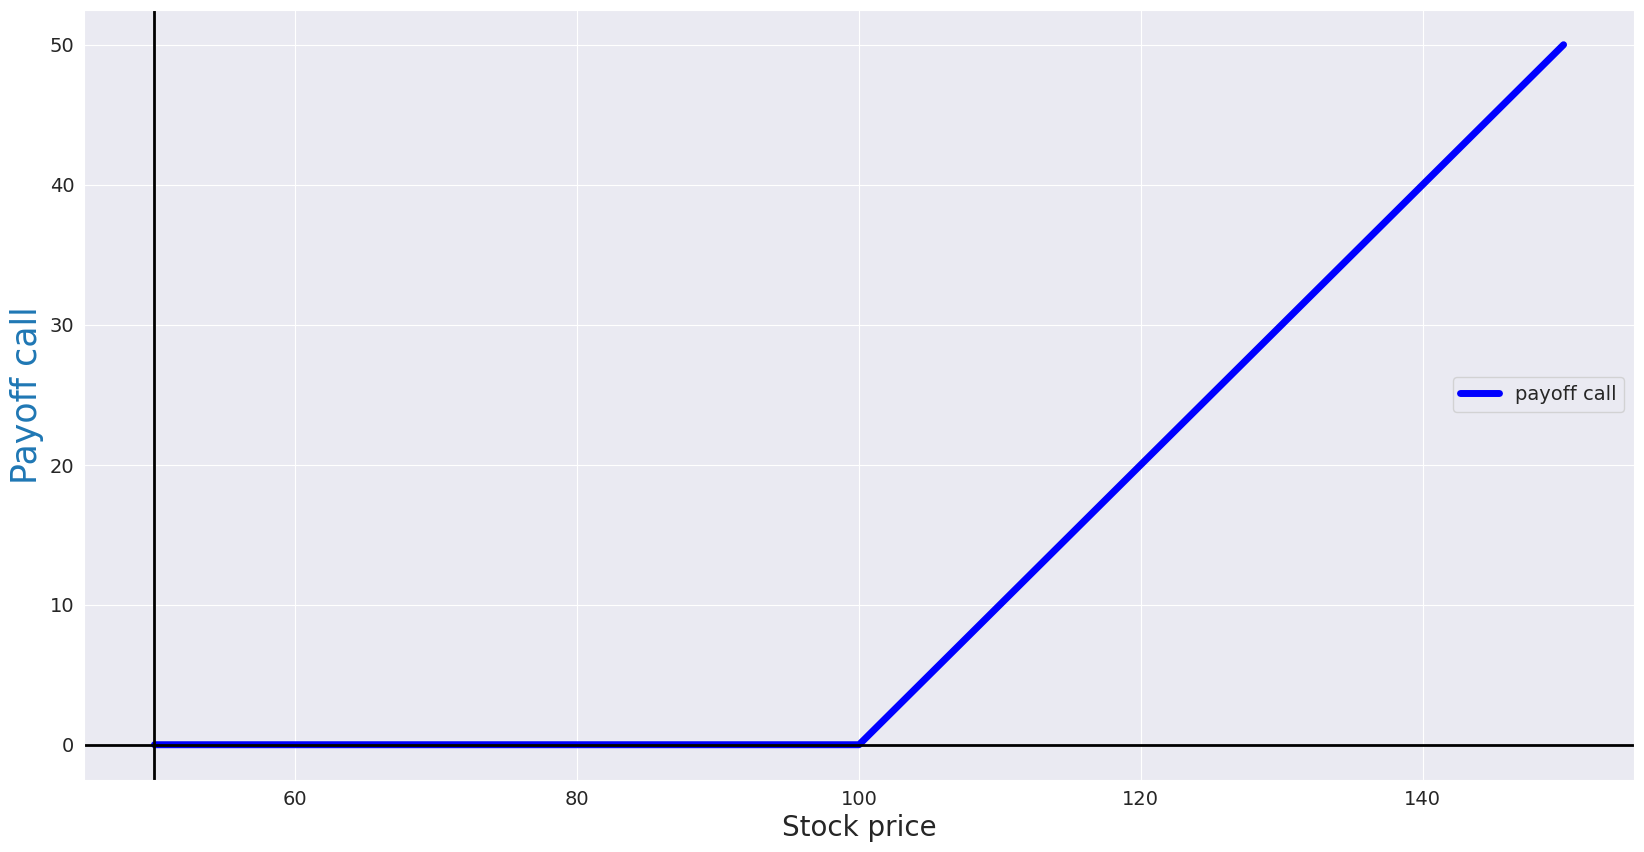

In [11]:
# plotando o payoff da call versus o preço do ativo ST
graf = df_payoff_call.plot(figsize = (20, 10), color = 'blue', lw = 5.0);


# melhorias no gráfico

# plotando legenda
plt.legend(loc = 'best')

# definindo a cor e espessura do eixo horizontal
graf.axhline(y = 0, color = 'k', lw = 2);

# definindo a cor e espessura do eixo horizontal
graf.axvline(x = sT_min, color = 'k', lw = 2);

# definindo os nomes dos eixos
graf.set(xlabel = 'Stock price', ylabel = 'Payoff call');

# definindo a cor das fontes
graf.yaxis.label.set_color('#1f77b4')

# definindo o tamanho das fontes
graf.yaxis.label.set_fontsize(25)
graf.xaxis.label.set_fontsize(20)

# <font color='blue'> P&L (PnL, profit/loss, lucro/prejuízo) de uma call

## <font color='Green'> Função para cálculo do P&L

In [12]:
# criando uma função no Python para calcular o P&L da call

def PnL_call(ST, strike_price, premio):

#     payoff = np.maximum(ST - strike_price, 0)
    payoff = payoff_call(ST = ST, strike_price = strike_price)

    PnL = payoff - premio

    return PnL

## <font color='Green'> Cálculo do P&L para um único valor de $S_T$

In [13]:
PnL_call(ST = 130, strike_price = 100, premio = 10)

20

## <font color='Green'> Cálculo do P&L para vários valores de $S_T$

In [14]:
# intervalo de valores para o preço da ação

# o intervalo de valores vai de (1 - alpha) * S0 até (1 + alpha) * S0
s0 = 100
alpha = 0.5
sT_min = (1 - alpha) * s0
sT_max = (1 + alpha) * s0
step_stock = 0.01 * s0

# Syntaxe: np.arange(start, stop, step); stop não está incluído na lista
sT = np.arange(start = sT_min, stop = sT_max + step_stock, step = step_stock)

# mostrando o resultado
sT

array([ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
       127., 128., 129., 130., 131., 132., 133., 134., 135., 136., 137.,
       138., 139., 140., 141., 142., 143., 144., 145., 146., 147., 148.,
       149., 150.])

In [15]:
# cálculo do P&L da call para vários valores de S_T
PnL_da_call = PnL_call(ST = sT, strike_price = 100, premio = 10)

# mostrando o resultado
PnL_da_call


array([-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10.,  -9.,  -8.,  -7.,  -6.,
        -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,
         6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,
        17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,
        28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,
        39.,  40.])

## <font color='Green'> Criando um DataFrame: $S_T$ e P&L

In [16]:
# criando um DataFrame com os valores de S_T e os valores do P&L

# passo 01 - criando um dicionário
dict_PnL_call = {'ST': sT, 'P&L call': PnL_da_call}

# passo 02 - setando S_T como index do DataFrame
df_PnL_call = pd.DataFrame(dict_PnL_call).set_index('ST')

# mostrando o resultado
df_PnL_call

,P&L call
ST,
50.0,-10.0
51.0,-10.0
52.0,-10.0
53.0,-10.0
54.0,-10.0
...,...
146.0,36.0
147.0,37.0
148.0,38.0


## <font color='Green'> Plotando o P&L

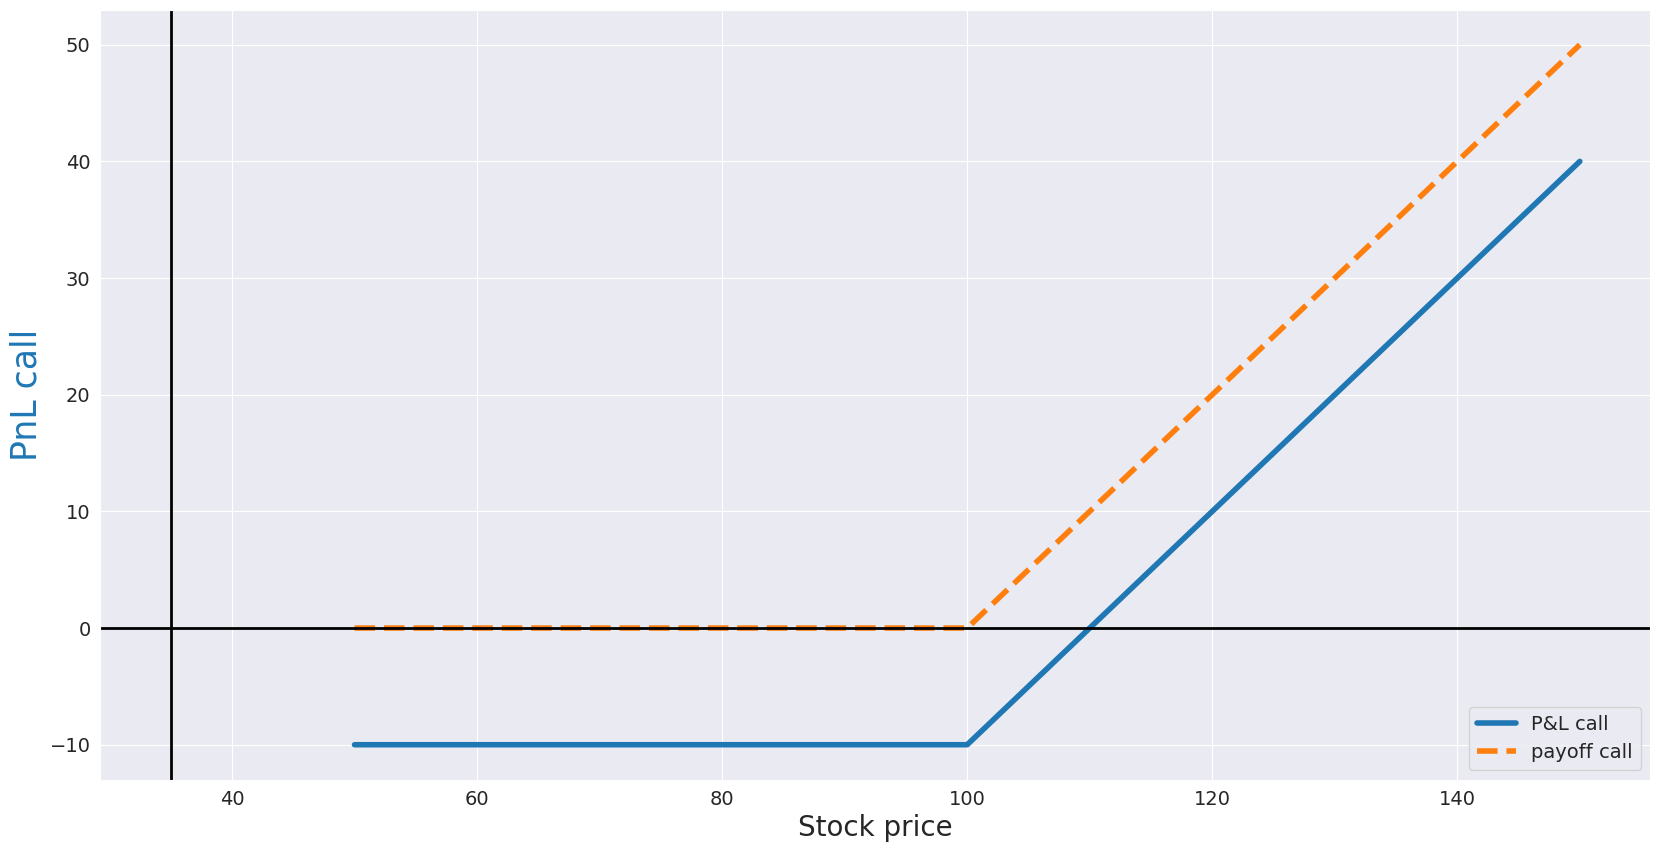

In [17]:
# plotando o PnL da call versus o preço do ativo ST
# graf = df_PnL_call['P&L call'].plot(figsize = (20, 10), lw = 4.0);
graf = df_PnL_call.plot(figsize = (20, 10), lw = 4.0);

# apenas para referência - plotando o payoff da call versus o preço do ativo ST
graf_payoff = df_payoff_call['payoff call'].plot(figsize = (20, 10), lw = 4.0, style ='--');


# melhorias no gráfico

# plotando legenda
plt.legend(loc = 'best')

# definindo os nomes dos eixos
graf.set(xlabel = 'Stock price', ylabel = 'PnL call');

# definindo a cor das fontes
# https://matplotlib.org/stable/tutorials/colors/colors.html
graf.yaxis.label.set_color('#1f77b4')

# definindo o tamanho das fontes
graf.yaxis.label.set_fontsize(25)
graf.xaxis.label.set_fontsize(20)

# definindo a cor e espessura do eixo horizontal
graf.axhline(y = 0, color = 'k', lw = 2);

# definindo a cor e espessura do eixo horizontal
graf.axvline(x = 0.7 * sT_min, color = 'k', lw = 2);


# <font color='blue'> Estratégias com opções - covered call

In [18]:
# o intervalo de valores vai de (1 - alpha) * S0 até (1 + alpha) * S0
s0 = 100
alpha = 0.3
s_min = (1 - alpha) * s0
s_max = (1 + alpha) * s0
dS = 0.01 * s0

s_T = np.arange(s_min, s_max + dS, dS)
# s_T

In [19]:
def payoff(S_T, TipoProduto, K = None):

    TipoProduto = TipoProduto.lower()

    if TipoProduto == 'underlying':
        return S_T

    elif TipoProduto == 'call':
        return np.maximum(S_T - K, 0)


In [20]:
# payoff(S_T = s_T, TipoProduto = 'underlying', K = pos1.get('preços'))

In [50]:
# underlying
# call

pos1 = {'TipoProduto': 'underlying',
        'preço': 100,
        'qtde': 0}

pos2 = {'TipoProduto': 'call',
        'strike': 85,
        'preço': 16,
        'qtde': 1}

pos3 = {'TipoProduto': 'call',
        'strike': 100,
        'preço': 11,
        'qtde': -2}


pos4 = {'TipoProduto': 'call',
        'strike': 115,
        'preço': 7,
        'qtde': 1}


n = 4  # número de posições
posicoes = []
for i in range(1, n + 1):
    posicoes.append(vars()[f'pos{i}'])

posicoes = [pos1, pos2, pos3, pos4]
print(posicoes)

[{'TipoProduto': 'underlying', 'preço': 100, 'qtde': 0}, {'TipoProduto': 'call', 'strike': 85, 'preço': 16, 'qtde': 1}, {'TipoProduto': 'call', 'strike': 100, 'preço': 11, 'qtde': -2}, {'TipoProduto': 'call', 'strike': 115, 'preço': 7, 'qtde': 1}]


In [22]:
def PnL_portfolio(S_T, posicoes):

    dict_PnLs = {'port': 0}

    for posicao in posicoes:

        # lendo os parâmetros de cada posição
        type_product = posicao['TipoProduto']
        strike = posicao.get('strike')
        preco = posicao.get('preço')
        qtde = posicao.get('qtde')

        # calculando o payoff e o PnL de cada posição
        payoff_i = payoff(S_T = S_T, TipoProduto = type_product, K = strike)
        PnL_i = (payoff_i - preco) * qtde

        if qtde != 0:

            # colocando o PnL de cada posição em uma key do dicionário
            dict_PnLs[f'{type_product} {strike}'] = PnL_i

            # somando o PnL de cada posição para obter o PnL do portfolio e colocando em uma key do dicionário
            dict_PnLs['port'] += PnL_i

    return dict_PnLs



In [23]:
# PnL_portfolio(S_T = s_T, posicoes = posicoes)

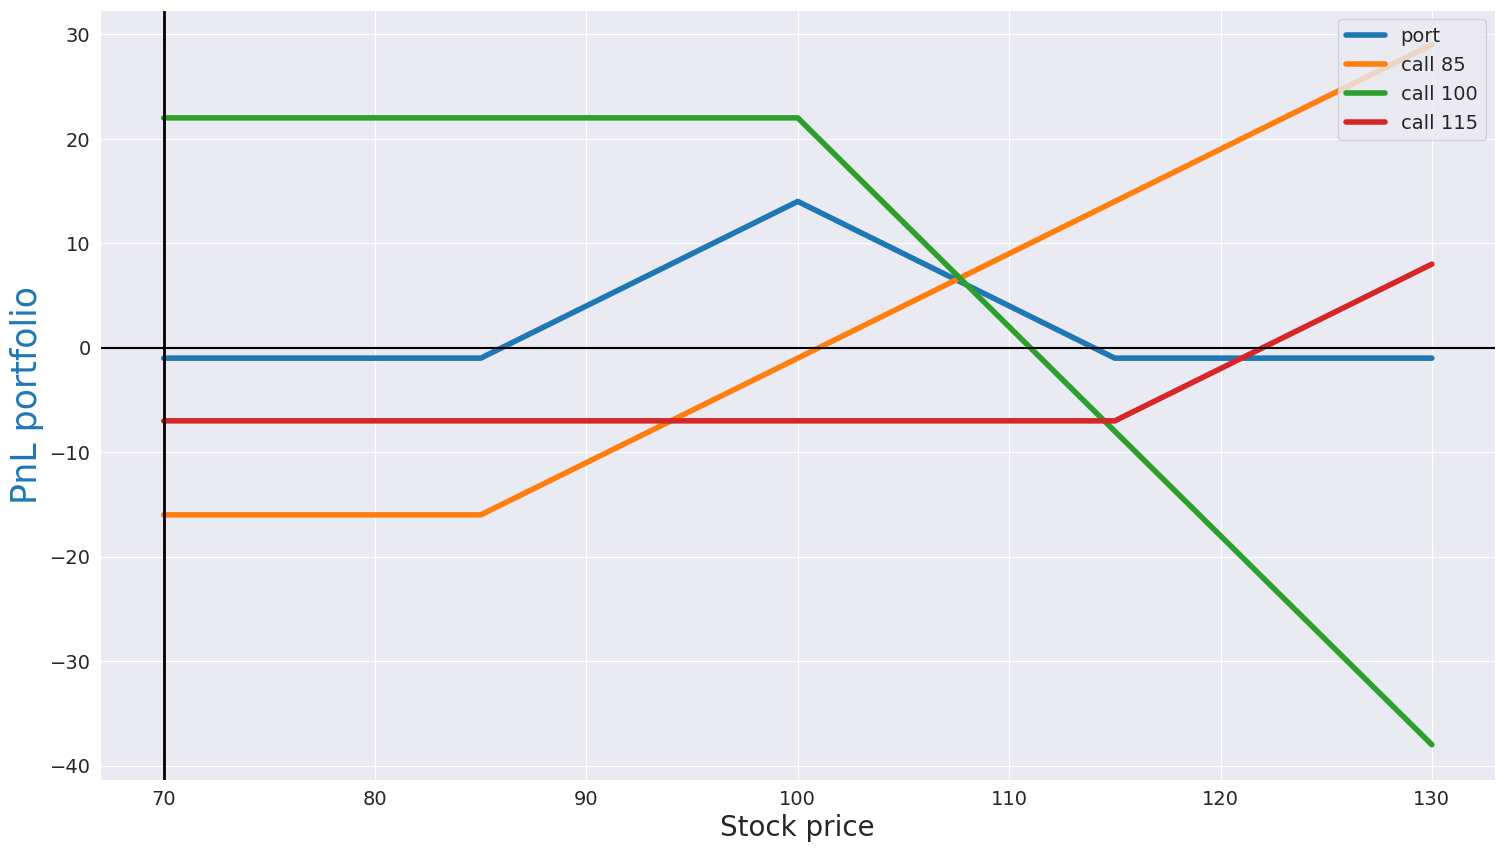

In [24]:
dict01 = PnL_portfolio(S_T = s_T, posicoes = posicoes)
df01 = pd.DataFrame(dict01, index = s_T)

graf = df01.plot(figsize = (18, 10), grid = True, lw = 4.0);

# melhorias no gráfico

# plotando legenda
plt.legend(loc = 'upper right');

# definindo a cor e espessura do eixo horizontal
graf.axhline(y = 0, color = 'k', lw = 1.5);

# definindo a cor e espessura do eixo vertical
graf.axvline(x = s_min, color = 'k', lw = 2);

# definindo os nomes dos eixos
graf.set(xlabel = 'Stock price', ylabel = 'PnL portfolio');

# definindo a cor das fontes
graf.yaxis.label.set_color('#1f77b4')

# definindo o tamanho das fontes
graf.yaxis.label.set_fontsize(25)
graf.xaxis.label.set_fontsize(20)


# <font color='blue'> Simulação de Monte Carlo para o preço da ação

## <font color='Green'> Movimento Browniano Geométrico

No modelo de Black & Scholes, o preço do ativo segue trajetórias descritas por um **Movimento Browniano Geométrico (GBM)**

<br>

$ret_{t, t+\Delta t} \, \sim N \left( \mu \cdot \Delta t, \sigma \cdot \sqrt{\Delta t} \right)$

$ \dfrac{\Delta S_t}{S_t} = ret_{t, t+\Delta t} \quad \Longrightarrow  \quad \dfrac{S_{t+\Delta t} - S_t}{S_t} = ret_{t, t+\Delta t}  \quad \Longrightarrow  \quad   S_{t+\Delta t} = S_t \cdot (1 + ret_{t, t+\Delta t}) $  


Seja $\Delta W_t \sim N \left(E \left(\Delta W_t \right) = 0, Var \left(\Delta W_t \right) = \Delta t \right)$ um incremento de um processo Browniano.


Então, a equação acima para o retorno fica:

$ \dfrac{\Delta S_t}{S_t} = ret_{t, t+\Delta t} \quad \Longrightarrow  \quad \dfrac{S_{t+\Delta t} - S_t}{S_t} = \mu \cdot \Delta t + \sigma \cdot \Delta W_t $

Podemos escrever o incremento $\Delta W_t$ como:

 $\Delta W_t =  \varepsilon_t \cdot \sqrt{\Delta t} $

Finalmente, obtemos uma equação recursiva para a dinâmica do preço do underlying:

$ S_{t+\Delta t} = S_t \cdot (1 + \mu \cdot \Delta t + \sigma \cdot \Delta W_t) \quad \Longrightarrow  \quad S_{t+\Delta t} = S_t \cdot \left(1 + \mu \cdot \Delta t + \sigma \cdot \varepsilon_t \cdot \sqrt{\Delta t} \right) $







## <font color='Green'> Função para geração de trajetórias do preço do ativo

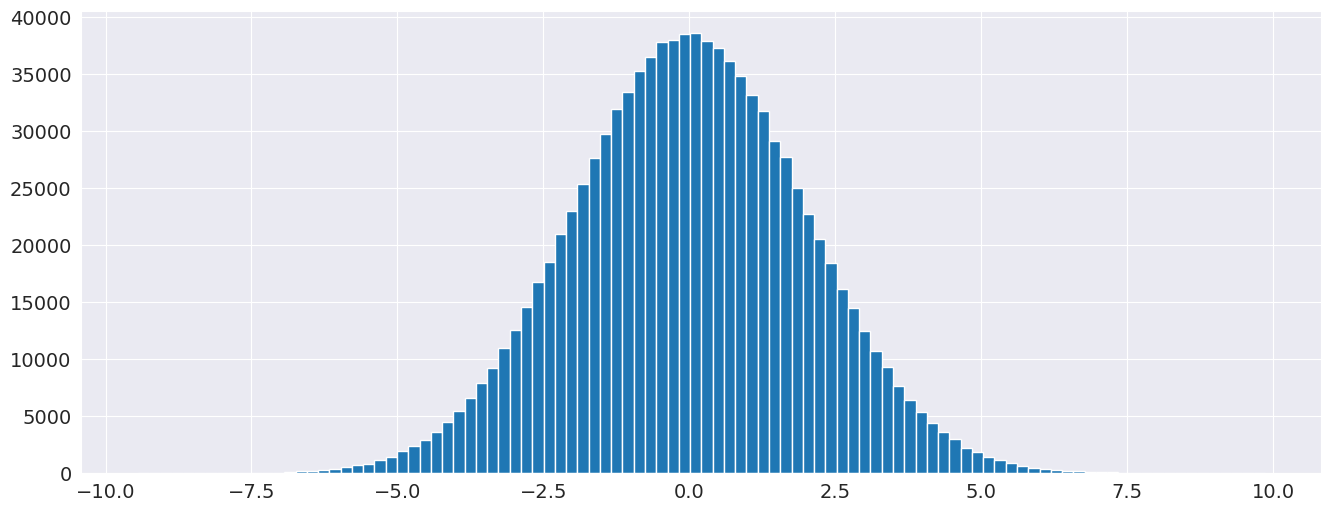

In [25]:
# relembrando sobre o que significa gerar números aleatórios...

# geração de números uniformemente distribuídos
np.random.random(size = 1000)

# geração de números normalmente distribuídos (loc = média, scale = std)
np.random.normal(loc = 0, scale = 1, size = 100)

# plotando o histograma
plt.hist(np.random.normal(loc = 0, scale = 2, size = 1000000), bins = 100);

In [26]:
def trajetorias_GBM(S0, mu, sigma, T, n_steps, n_trajs):


    ''' função que simula múltiplas trajetórias do preço de um ativo seguindo um movimento browniano geométrico (GBM).
        parâmetros da função:
        s0: preço inicial do ativo
        mu: taxa de retorno esperada do ativo
        sigma: volatilidade (desvio-padrão) dos retornos do ativo
        T: tempo total da simulação
        n_steps: número de passos da simulação
        n_trajs: número de trajetórias '''


    # criando um array com os tempos
    # evenly spaced values within a given interval [start, stop)
    delta_t = T / n_steps
    tempo = np.arange(start = 0, stop = T + 0.9 * delta_t, step = delta_t)

    # calculando média e desv_pad dos retornos
    media = mu * delta_t
    desv_pad = sigma * np.sqrt(delta_t)

    # criando um array para os preços do underlying em cada trajetória
    St = np.zeros((n_steps + 1, n_trajs))

    # determinando o valor St = S0 para t = 0 em todas as trajetórias
    St[0, :] = S0

    # gerando o retornos do underlying com distribuição normal N(media, desv_pad) para cada trajetória
    ret = np.random.normal(media, desv_pad, (n_steps, n_trajs))

    # For loop para os n passos da simulação
    for i in range(1, n_steps + 1):
        St[i, :] = St[i-1, :] * (1 + ret[i-1, :])

    # criando um DataFrame com cada trajetória de preços do underlying, e com o array de tempo como index
    df = pd.DataFrame(St, index = tempo)

    return df



In [27]:
def trajetorias_GBM_ant(S0, mu, sigma, T, n_steps, n_trajs):


    ''' função que simula múltiplas trajetórias do preço de um ativo seguindo um movimento browniano geométrico (GBM).
        parâmetros da função:
        s0: preço inicial do ativo
        mu: taxa de retorno esperada do ativo
        sigma: volatilidade (desvio-padrão) dos retornos do ativo
        T: tempo total da simulação
        n_steps: número de passos da simulação
        n_trajs: número de trajetórias '''


    # criando um array com os tempos
    delta_t = T / n_steps
    tempo = np.arange(start = 0, stop = T + 0.9 * delta_t, step = delta_t)  # evenly spaced values within a given interval [start, stop)


    # calculando média e desv_pad dos retornos
    media = mu * delta_t
    desv_pad = sigma * np.sqrt(delta_t)

    # criando um array para os preços do underlying em cada trajetória
    St = np.zeros((n_steps + 1, n_trajs))
    St_ant = np.zeros((n_steps + 1, n_trajs))


    # determinando o valor St = S0 para t = 0 em todas as trajetórias
    St[0, :] = S0
    St_ant[0, :] = S0


    # gerando o retornos do underlying com distribuição normal N(media, desv_pad) para cada trajetória
    eps = np.random.normal(0, 1, (n_steps, n_trajs))
    ret = media + desv_pad * eps
    ret_ant = media + desv_pad * (-eps)


    # For loop para os n passos da simulação
    for i in range(1, n_steps + 1):
        St[i, :] = St[i-1, :] * (1 + ret[i-1, :])
        St_ant[i, :] = St_ant[i-1, :] * (1 + ret_ant[i-1, :])


    St = np.hstack((St_ant, St))

    # criando um DataFrame com cada trajetória de preços do underlying, e com o array de tempo como index
    df = pd.DataFrame(St, index = tempo)


    return df



In [28]:
# simulando trajetórias do preço do ativo
simul01 = trajetorias_GBM_ant(S0 = 100, mu = 0.1, sigma = 0.25, T = 1, n_steps = 4 * 252, n_trajs = 5)

# mostrando o resultado
simul01

,0,1,2,3,4,5,6,7,8,9
0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
0.000992,100.226442,98.924720,101.277135,99.957892,99.647648,99.793400,101.095122,98.742707,100.061949,100.372193
0.001984,100.888427,98.361511,100.786877,100.480071,97.978636,99.154075,101.690745,99.240288,99.559080,102.073256
0.002976,101.327122,97.922662,99.614054,99.797740,97.836723,98.742595,102.164625,100.414804,100.254911,102.241352
0.003968,101.287414,98.119611,101.532489,98.793225,98.374968,98.800882,101.979415,98.500871,101.283920,101.699162
...,...,...,...,...,...,...,...,...,...,...
0.996032,99.402221,89.570680,141.568251,92.355140,120.142443,115.631011,128.112256,80.900826,124.033128,95.684976
0.997024,100.516323,89.423255,143.554804,92.239218,119.675785,114.357960,128.348535,79.781638,124.213421,96.075621
0.998016,100.528347,89.883393,144.916535,92.195852,119.595060,114.366970,127.713569,79.040676,124.296465,96.159489
0.999008,99.908380,89.117807,144.768342,92.097836,118.712644,115.094973,128.826714,79.137186,124.453270,96.888068


## <font color='Green'> Plotando as trajetórias do preço do ativo

In [29]:
# simulando trajetórias do preço do ativo
simul02 = trajetorias_GBM(S0 = 100, mu = 0.1, sigma = 0.25, T = 1, n_steps = 4 * 252, n_trajs = 10000)

# selecionando apenas o último preço de cada trajetória: S_T
sT02 = simul02.iloc[-1, :]

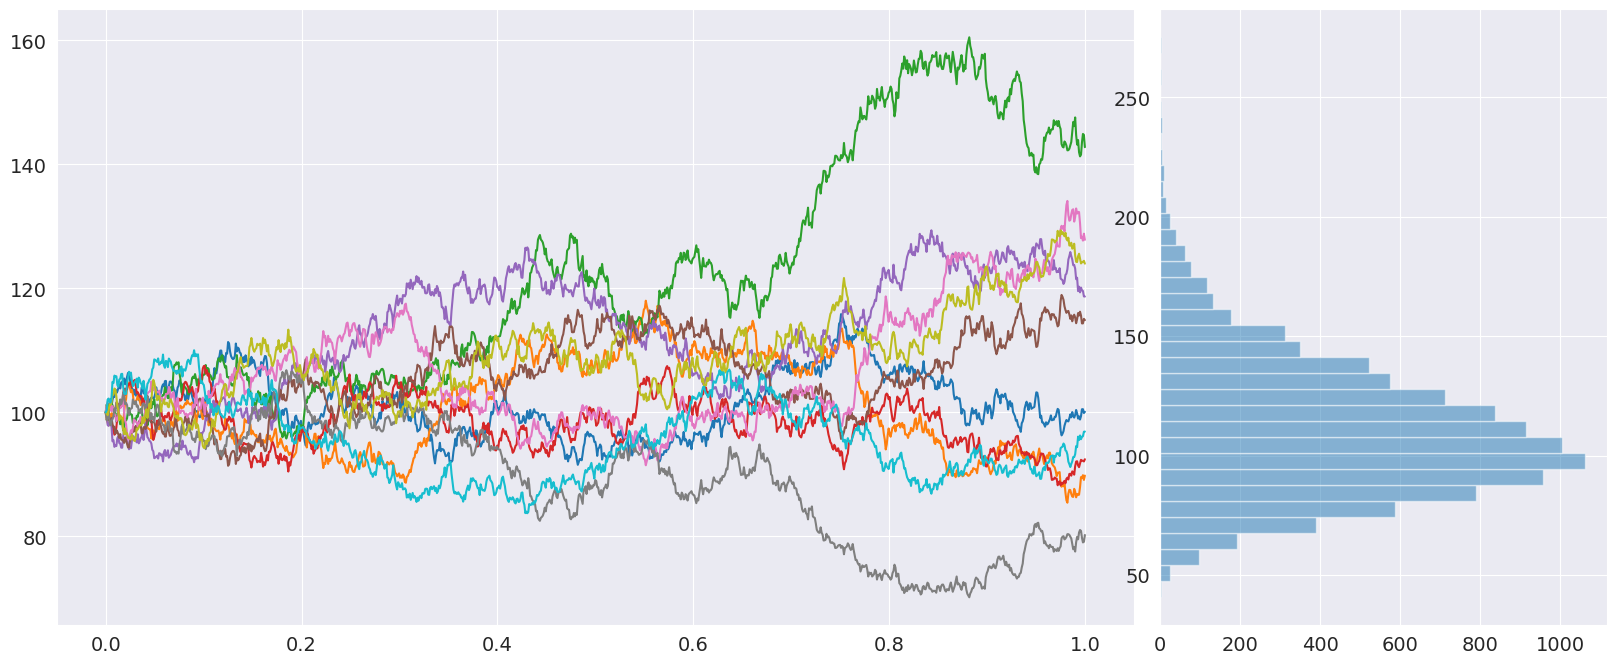

In [30]:
# ajustando o tamanho da figura
figure(figsize = (20, 8))

# plotando as trajetórias
plt.subplot(1, 10, (1, 7))
plt.plot(simul01);
# plt.plot(simul02);
# plt.yticks([]);

# plotando os resultados
plt.subplot(1, 10, (8, 10))
plt.hist(sT02, bins = 35, alpha = 0.5, orientation = 'horizontal');
# plt.xlim(xmin = 250, xmax = 50)


Por que é importante conhecer as trajetórias do preço do ativo ao longo do tempo, i.e., $\left( S_\tau \right)_{t_0<\tau<T}$, e não apenas o preço final $S_T$?


No caso da call vanilla, apenas o valor final interessa para o cálculo do payoff.


Contudo, há vários produtos financeitos (chamados derivativos exóticos) cujo payoff depende do que ocorre com o preço do ativo ao longo de sua trajetória.

# <font color='blue'> Simulação de Monte Carlo para o preço da call

## <font color='Green'> Preço do derivativo - Martingale Pricing

$V_t = V(t, S_t) = E_{t}^{Q} \left [ \dfrac{V(S_T)}{e^{r \cdot (T-t)}} \right ] $

### Lei do grandes números (law of large numbers)

Seja $X_1, X_2,...$ uma sequência infinita de variáveis aleatórias independentes e identicamente distribuídas (i.i.d.), com valor esperado $E(X_i) = \mu$.

Considere a seguinte estatística amostral:

$ g(X_i) = \bar{X_n} = \bar{X} = \displaystyle \frac{1}{n} \cdot \sum_{i=1}^{n} X_i $

<br>

**Weak law of large numbers:**

$\bar{X} \overset{P} \longrightarrow \mu  \quad \text{quando} \quad n \longrightarrow \infty \quad \Longleftrightarrow  \quad \displaystyle{ \lim_{n \to \infty} P  \left(  \left| \bar{X} - \mu \right | > \varepsilon \right) = 0} $

<br>

**Strong law of large numbers:**

$\bar{X} \overset{a.s.} \longrightarrow \mu  \quad \text{quando} \quad n \longrightarrow \infty \quad \Longleftrightarrow  \quad \displaystyle{ P  \left( \lim_{n \to \infty} \bar{X} = \mu \right) = 1} $







## <font color='Green'> O que significa essa fórmula?

In [31]:
# gerando as trajetórias de preços do underlying
St = trajetorias_GBM(S0 = 100, mu = 0.1, sigma = 0.20, T = 1, n_steps = 4 * 252, n_trajs = 30000)
ST = St.iloc[-1, :]

In [32]:
# calculando o Payoff do derivativo (call) para cada um dos preços finais ST gerados na simulação de Monte Carlo
Payoff_do_derivativo = np.maximum(ST - 100, 0)

# criando o DataFrame - usando ST como index (e ordenando)
df_PnL_estrat = pd.DataFrame({'ST': ST, 'Payoff derivativo': Payoff_do_derivativo}).set_index('ST').sort_index()


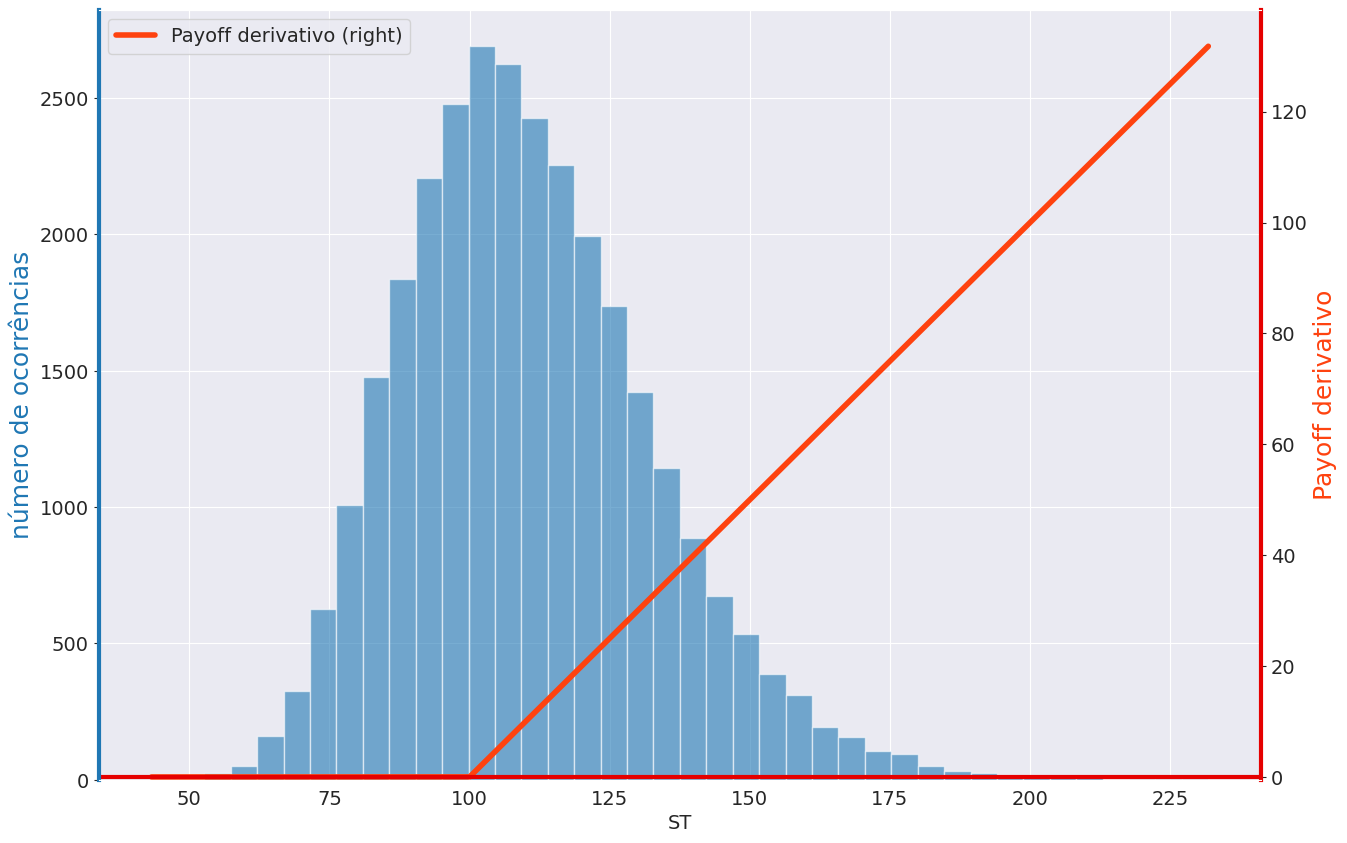

In [33]:
plt.figure(figsize = (15, 10))

# histograma dos preços do ativo
gr01 = plt.hist(ST, bins = 40, alpha = 0.6)
# gr01 = plt.hist(ST, bins = 40, density = True, cumulative = False, alpha = 0.6)

# definindo o label, o tamanho da letra e a cor
plt.ylabel('número de ocorrências', fontsize = 18, color = '#1f77b4');  # '#1f77b4' representa a cor 'default blue'

# gráfico do payoff da call
gr02 = df_PnL_estrat['Payoff derivativo'].plot(secondary_y = True, lw = 4.0, color = 'xkcd:orangered')
gr02.set_ylim(bottom = -0.5)

# definindo o label, o tamanho da letra e a cor
plt.ylabel('Payoff derivativo', fontsize = 18, color = 'xkcd:orangered')


# melhorias no gráfico

# plotando legenda
plt.legend(loc = 'best')

# definindo a cor do eixo vertical esquerdo
gr02.spines['left'].set_color('#1f77b4')

# definindo a espessura do eixo vertical esquerdo
gr02.spines['left'].set_lw(3)

# definindo a cor e espessura do eixo vertical direito
gr02.spines['right'].set_color('xkcd:red')

# definindo a espessura do eixo vertical esquerdo
gr02.spines['right'].set_lw(3)

# definindo a cor e espessura do eixo horizontal
gr02.axhline(y = 0, color = 'xkcd:red', lw = 3);

## <font color='Green'> Apreçamento de derivativos por Simulação de Monte Carlo

In [34]:
s0 = 100
r = 0.1
T = 1
sigma = 0.4
n_steps = 4 * 252
n_trajs = 100000
strike_price = 115

In [35]:
St = trajetorias_GBM_ant(S0 = s0, mu = r, sigma = sigma, T = T, n_steps = n_steps, n_trajs = n_trajs)
ST = St.iloc[-1, :]


In [36]:
# Apreçamento da call
Vt = np.exp(-r * T) * np.mean(np.maximum(ST - strike_price, 0))
Vt

14.235228798203753

In [37]:
# Apreçamento da call
Vt = np.exp(-r * T) * np.mean(payoff_call(ST, strike_price = strike_price))
Vt

14.235228798203753

In [38]:
# Apreçamento da put
Vt = np.exp(-r * T) * np.mean(np.maximum(strike_price - ST, 0))
Vt

18.292729937468717

## <font color='Green'> Apreçamento de derivativos pela fórmula de Black & Scholes

In [39]:
# Black and Scholes option pricing model

def option_price(St, K, tau, r, q, sigma, type_call_put = 'call'):

# St: spot price
# K: strike price
# tau: time to maturity
# r: continuously compounded interest rate
# q: rate of continuously paid dividend paying asset
# sigma: volatility of the underlying asset

    d1 = (np.log(St / K) + (r - q + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = (np.log(St / K) + (r - q - 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))

    if type_call_put == 'call':
        price = St * np.exp(-q * tau) * ss.norm.cdf(d1) - K * np.exp(-r * tau) * ss.norm.cdf(d2)

    elif type_call_put == 'put':
        price = K * np.exp(-r * tau) * ss.norm.cdf(-d2) - St * np.exp(-q * tau) * ss.norm.cdf(-d1)

    return price

In [40]:
# call price
option_price(St = s0, K = strike_price, tau = T/12, r = r, q = 0, sigma = sigma, type_call_put = 'call')

0.7833207683382337

In [41]:
# put price
option_price(St = s0, K = strike_price, tau = T, r = r, q = 0, sigma = sigma, type_call_put = 'put')

18.280364759671258

# <font color='blue'> Simulação de Monte Carlo para o PnL de uma estratégia

In [42]:
# gerando as trajetórias de preços do underlying
St = trajetorias_GBM(S0 = 100, mu = 0.1, sigma = 0.40, T = 1/12, n_steps = 4 * 252, n_trajs = 30000)
ST = St.iloc[-1, :]

In [43]:
# calculando o PnL da estratégia para cada um dos preços finais ST gerados na simulação de Monte Carlo
PnL_do_underlying = 1 * (ST - 100)
PnL_da_call01 = 0 * (np.maximum(ST - 85, 0) - 1.8)
PnL_da_call02 = 0 * (np.maximum(ST - 100, 0) - 3.25)
PnL_da_call03 = -1 * (np.maximum(ST - 115, 0) - 0.78)
PnL_estrategia = np.array(PnL_do_underlying + PnL_da_call01 + PnL_da_call02 + PnL_da_call03)

# criando o DataFrame - usando ST como index (e ordenando)
df_PnL_estrat = pd.DataFrame({'ST': ST, 'P&L estrat': PnL_estrategia}).set_index('ST').sort_index()


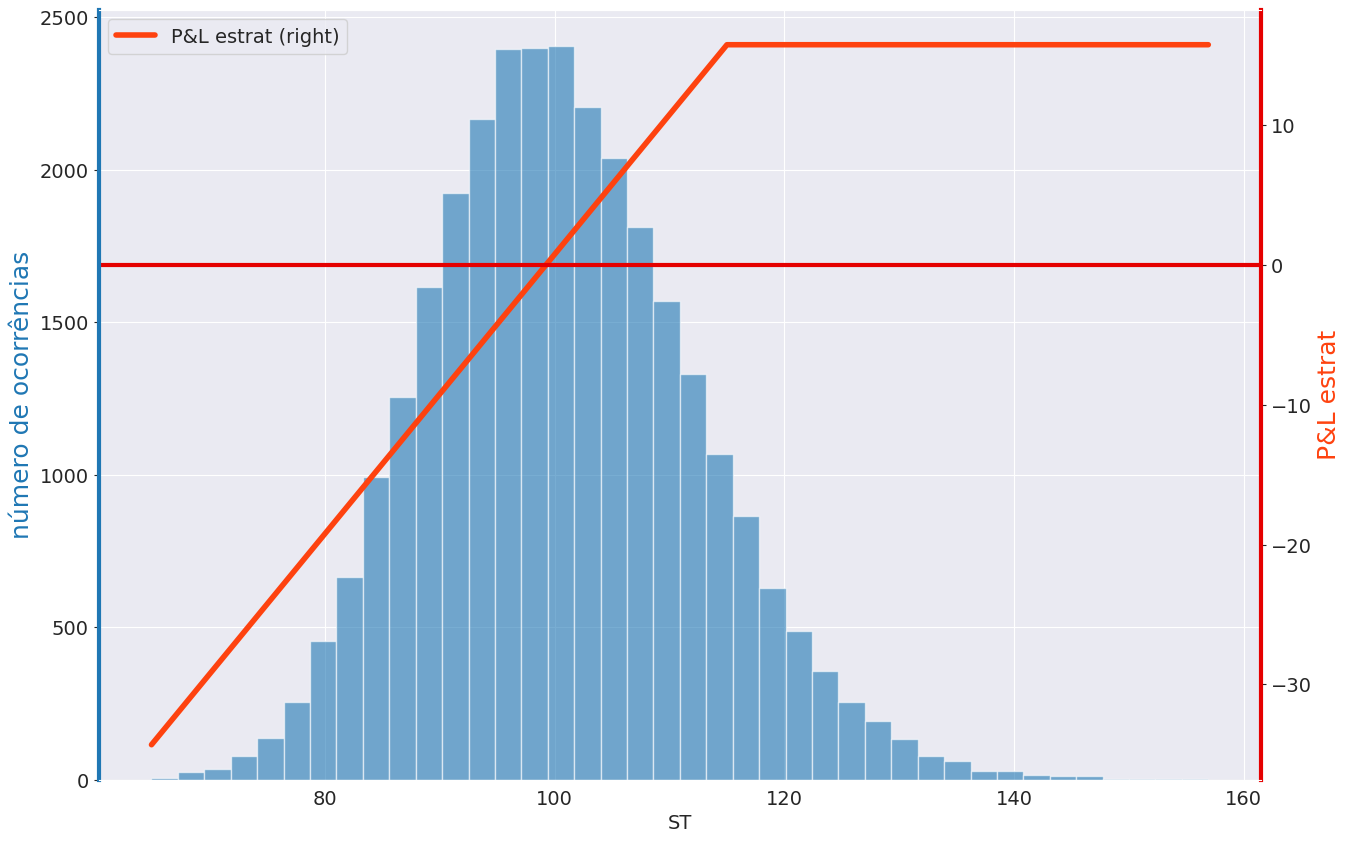

In [44]:
plt.figure(figsize = (15, 10))

# histograma dos preços do ativo
gr01 = plt.hist(ST, bins = 40, alpha = 0.6)
# gr01 = plt.hist(ST, bins = 40, density = True, cumulative = True, alpha = 0.6)

# definindo o label, o tamanho da letra e a cor
plt.ylabel('número de ocorrências', fontsize = 18, color = '#1f77b4');  # '#1f77b4' representa a cor 'default blue'

# gráfico do payoff da call
gr02 = df_PnL_estrat['P&L estrat'].plot(secondary_y = True, lw = 4.0, color = 'xkcd:orangered')

# definindo o label, o tamanho da letra e a cor
plt.ylabel('P&L estrat', fontsize = 18, color = 'xkcd:orangered')



# melhorias no gráfico

# plotando legenda
plt.legend(loc = 'best')

# definindo a cor do eixo vertical esquerdo
gr02.spines['left'].set_color('#1f77b4')

# definindo a espessura do eixo vertical esquerdo
gr02.spines['left'].set_lw(3)

# definindo a cor e espessura do eixo vertical direito
gr02.spines['right'].set_color('xkcd:red')

# definindo a espessura do eixo vertical esquerdo
gr02.spines['right'].set_lw(3)

# definindo a cor e espessura do eixo horizontal
gr02.axhline(y = 0, color = 'xkcd:red', lw = 3);

In [45]:
# df_PnL_estrat

In [46]:
# mostrando o resultado
df_PnL_estrat.describe(percentiles = [0.05, 0.1, 0.25, 0.30, 0.5, 0.75, 0.90, 0.95])

,P&L estrat
count,30000.000000
mean,0.708438
std,10.170662
min,-34.318966
5%,-16.413852
10%,-12.871476
25%,-6.650020
30%,-5.038228
50%,0.756710
75%,8.903219
